In [84]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np
import statsmodels.api as sm

In [85]:
ticker = '000300.SS'
end_date = datetime.now().strftime('%Y-%m-%d')
data = yf.download(ticker, start='2023-01-01', end=end_date)

data.reset_index(inplace=True)
print(data)

[*********************100%***********************]  1 of 1 completed

          Date         Open         High          Low        Close  \
0   2023-01-03  3864.840088  3893.989990  3831.250000  3887.899902   
1   2023-01-04  3886.250000  3905.899902  3873.649902  3892.949951   
2   2023-01-05  3913.489990  3974.879883  3912.260010  3968.580078   
3   2023-01-06  3969.550049  4000.409912  3966.469971  3980.889893   
4   2023-01-09  3998.530029  4023.090088  3990.709961  4013.120117   
..         ...          ...          ...          ...          ...   
405 2024-09-03  3261.739990  3281.590088  3261.189941  3273.429932   
406 2024-09-04  3253.899902  3272.989990  3249.979980  3252.159912   
407 2024-09-05  3252.959961  3266.879883  3247.169922  3257.760010   
408 2024-09-06  3261.149902  3274.810059  3231.070068  3231.350098   
409 2024-09-09  3214.800049  3222.929932  3180.929932  3192.949951   

       Adj Close  Volume  
0    3887.899902  115100  
1    3892.949951  110700  
2    3968.580078  116500  
3    3980.889893  111000  
4    4013.120117  117100

In [86]:
data['Log Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
data = data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume,Log Return
1,2023-01-04,3886.250000,3905.899902,3873.649902,3892.949951,3892.949951,110700,0.001298
2,2023-01-05,3913.489990,3974.879883,3912.260010,3968.580078,3968.580078,116500,0.019241
3,2023-01-06,3969.550049,4000.409912,3966.469971,3980.889893,3980.889893,111000,0.003097
4,2023-01-09,3998.530029,4023.090088,3990.709961,4013.120117,4013.120117,117100,0.008064
5,2023-01-10,4014.709961,4030.459961,4002.229980,4017.469971,4017.469971,101800,0.001083
...,...,...,...,...,...,...,...,...
405,2024-09-03,3261.739990,3281.590088,3261.189941,3273.429932,3273.429932,122900,0.002576
406,2024-09-04,3253.899902,3272.989990,3249.979980,3252.159912,3252.159912,104800,-0.006519
407,2024-09-05,3252.959961,3266.879883,3247.169922,3257.760010,3257.760010,97100,0.001720
408,2024-09-06,3261.149902,3274.810059,3231.070068,3231.350098,3231.350098,88400,-0.008140


In [87]:
STOCKS = []
def get_stock_data(tickers):
    end_date = datetime.now().strftime('%Y-%m-%d')
    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        data = yf.download(ticker, start='2023-01-01', end=end_date)

        data.reset_index(inplace=True)
        STOCKS.append(data)

tickers = ['601127.SS', '002594.SZ', '002432.SZ']
get_stock_data(tickers)

for i, stock in enumerate(STOCKS):
    stock['Log Return'] = np.log(stock['Adj Close'] / stock['Adj Close'].shift(1))
    stock = stock.dropna()
    STOCKS[i] = stock
    
print(STOCKS)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for 601127.SS...
Fetching data for 002594.SZ...
Fetching data for 002432.SZ...
[          Date       Open       High        Low      Close  Adj Close  \
1   2023-01-04  41.000000  41.330002  40.290001  40.740002  40.740002   
2   2023-01-05  41.680000  42.000000  40.880001  41.099998  41.099998   
3   2023-01-06  40.880001  42.150002  40.709999  41.209999  41.209999   
4   2023-01-09  40.980000  42.410000  40.820000  41.450001  41.450001   
5   2023-01-10  41.700001  45.200001  40.599998  44.000000  44.000000   
..         ...        ...        ...        ...        ...        ...   
405 2024-09-03  74.080002  75.250000  73.610001  74.849998  74.849998   
406 2024-09-04  74.370003  75.250000  73.680000  74.550003  74.550003   
407 2024-09-05  74.989998  77.500000  74.650002  76.820000  76.820000   
408 2024-09-06  76.820000  78.500000  75.570000  75.680000  75.680000   
409 2024-09-09  74.959999  76.500000  74.480003  76.180000  76.180000   

       Volume  Log Return  
1

In [88]:
X = data['Log Return']

# Y
tmp = pd.DataFrame({
    'stock_A': STOCKS[0]['Log Return'],
    'stock_B': STOCKS[1]['Log Return'],
    'stock_C': STOCKS[2]['Log Return']
})
weights = np.array([1/3, 1/3, 1/3])
portfolio_log_return = tmp.dot(weights)
y = portfolio_log_return

X, y



(1      0.001298
 2      0.019241
 3      0.003097
 4      0.008064
 5      0.001083
          ...   
 405    0.002576
 406   -0.006519
 407    0.001720
 408   -0.008140
 409   -0.011955
 Name: Log Return, Length: 409, dtype: float64,
 1     -0.018797
 2      0.011135
 3      0.007943
 4     -0.002397
 5      0.025046
          ...   
 405    0.014083
 406    0.010757
 407    0.020696
 408   -0.010601
 409   -0.004050
 Length: 409, dtype: float64)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     143.1
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           1.78e-28
Time:                        17:45:31   Log-Likelihood:                 1122.3
No. Observations:                 409   AIC:                            -2241.
Df Residuals:                     407   BIC:                            -2233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      1.144      0.2

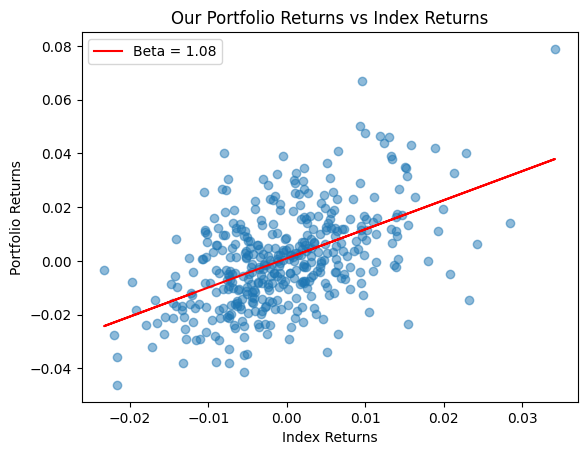

In [89]:
import matplotlib.pyplot as plt

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

beta = model.params['Log Return']
alpha = model.params['const']

print(f"Beta: {beta}")
print(f"Alpha: {alpha}")

plt.scatter(data['Log Return'], portfolio_log_return, alpha=0.5)
plt.plot(data['Log Return'], model.predict(X), color='red', label=f'Beta = {beta:.2f}')
plt.title('Our Portfolio Returns vs Index Returns')
plt.xlabel('Index Returns')
plt.ylabel('Portfolio Returns')
plt.legend()
plt.show()